# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/test.p'
testing_file = './data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(np.max(y_train))

42


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(np.unique(y_train))+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

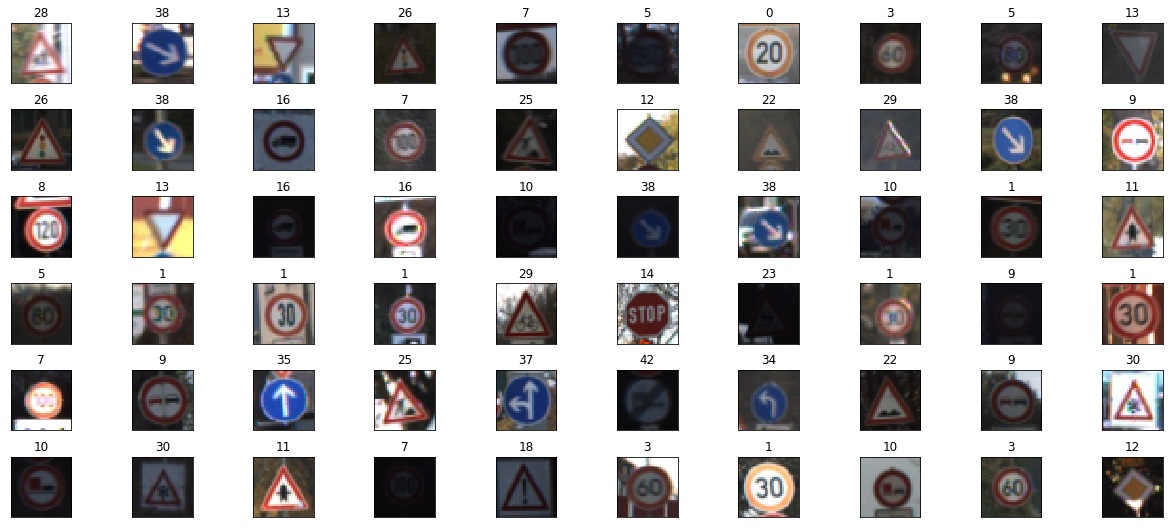

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
fig = plt.figure(figsize=(16, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=1)
#Randomly displaying 60 images from dataset
for i in range(60):
    index = random.randint(0,n_train)
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[index], interpolation='nearest')
    ax.set_title(str(y_train[index]))

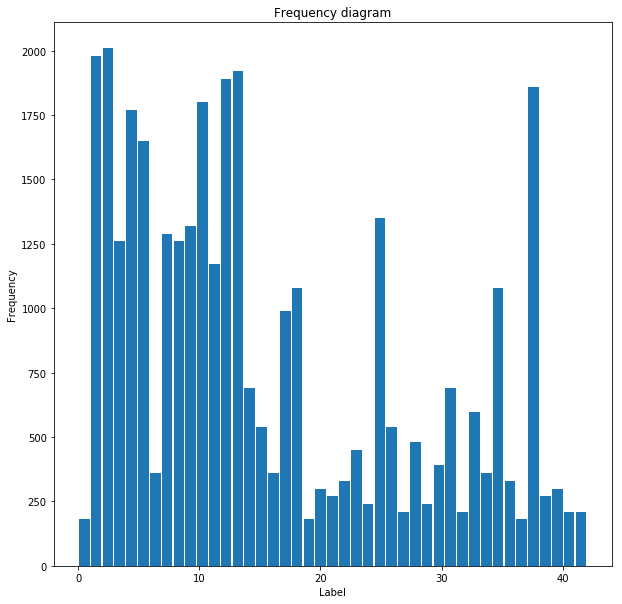

In [4]:
#Frequency diagram of the different classes
hist, bins = np.histogram(y_train, bins=43)
fig = plt.figure(figsize=(10,10))
plt.bar((bins[1:] + bins[:-1]) * .5, hist, width=0.9*(bins[1] - bins[0]),align='center')
plt.title("Frequency diagram")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.style.use('ggplot')
plt.show()

[9960, 2220, 31439, 5370, 6810, 12360, 21450, 23730, 15870, 11040, 17130, 8580, 27329, 21810, 29219, 29909, 5010, 30449, 20370, 6630, 25950, 25680, 4500, 1770, 10800, 33449, 1230, 10350, 26849, 10560, 25020, 210, 10140, 26250, 20010, 18930, 900, 4830, 14010, 25410, 4200, 0, 9750]


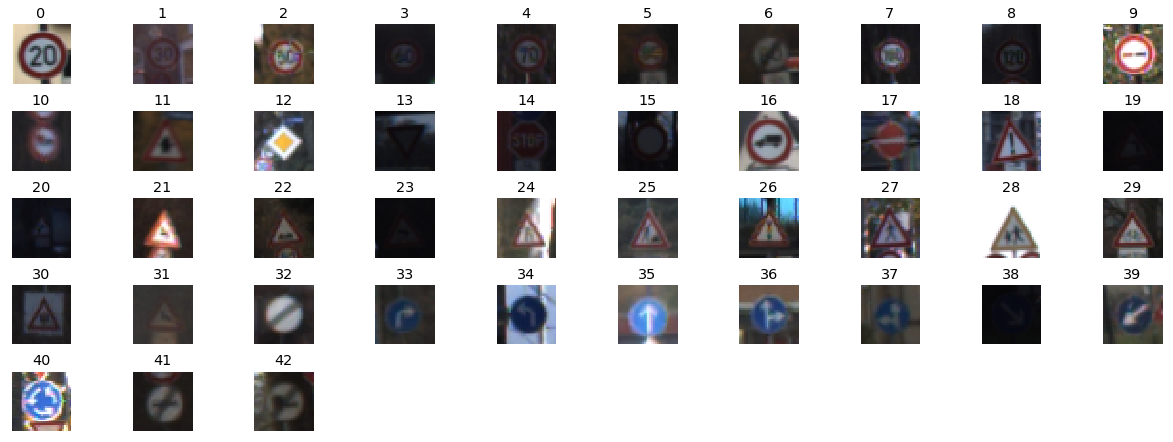

In [5]:
#Displaying one image of each class 
indices = []
cur = 0
flag=0
while flag==0:
    for i in range(len(X_train)):
        if y_train[i]==cur:
            indices.append(i)
            break
    cur = cur+1
    if cur==43:
        flag=1
fig = plt.figure(figsize=(16, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=1)
print(indices)
for i in range(43):
    #index = random.randint(0,n_train)
    index = indices[i]
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[index], interpolation='nearest')
    ax.set_title(str(y_train[index]))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(34799, 32, 32)


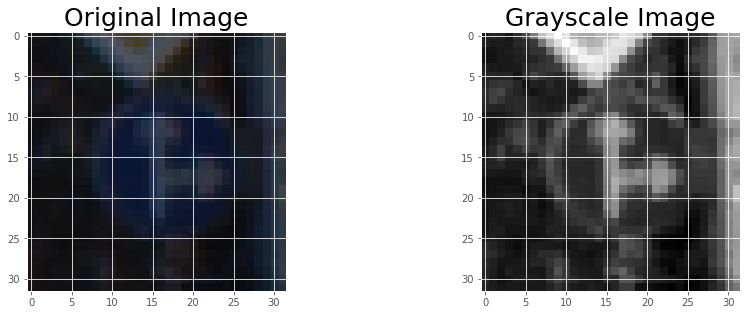

In [6]:
#Function to grayscale and normalize one image
def gray(src):
    src = np.array(src/255.0, dtype=np.float32)
    dst = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    return dst.reshape(32,32,1)

#Function to grayscale and normalize the dataset
def gray_dataset(src):
    gray_imgs = [gray(img) for img in src]
    return np.array(gray_imgs)
gray_datasets = np.squeeze(gray_dataset(X_train),axis=3)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.tight_layout()
ax1.imshow(X_train[1000])
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(gray_datasets[1000],cmap='gray')
ax2.set_title('Grayscale Image', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
print(gray_datasets.shape)

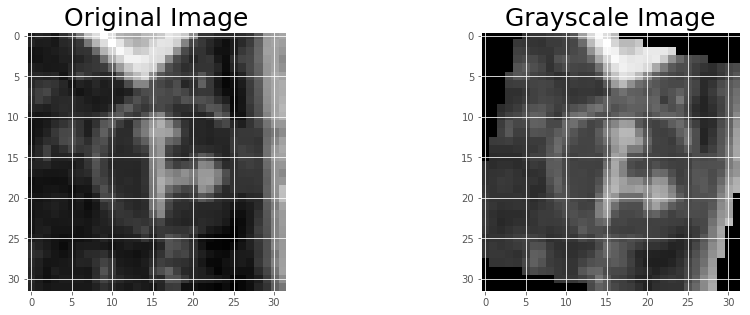

In [9]:
import scipy.ndimage as scnd

#Randomly rotate a image(max rotation is 15 degrees in each direction)
def add_rotation(X_train):
    angle = np.random.normal(0.,10)
    if(angle > 15.):
        angle = 15.
    if(angle < -15.):
        angle = -15.
    rotated_img = scnd.interpolation.rotate(X_train,angle)
    edge_added = rotated_img.shape[0]-32
    bgn_zoomed = np.floor(edge_added/2).astype(int)
    end_zoomed = bgn_zoomed + 32
    rotated_img = rotated_img[bgn_zoomed:end_zoomed,bgn_zoomed:end_zoomed,:]
    return rotated_img
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.tight_layout()
ax1.imshow(gray_datasets[1000],cmap='gray')
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(np.squeeze(gray(add_rotation(X_train[1000])),axis=2),cmap='gray')
ax2.set_title('Grayscale Image', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [13]:
#Augmenting dataset with rotated images
#Adding 500 or 2200-current count depending on which is smaller for each class
import random
X_train = gray_dataset(X_train)
X_valid = gray_dataset(X_valid)
augmented_dataset_x = []
augmented_dataset_y = []
num_examples_per_label = 2200
for i in range(0,n_classes):
    if(num_examples_per_label-hist[i]>500):
        num = 500
    else:
        num = num_examples_per_label-hist[i]
    for j in range(0,num-1):
        index = random.choice(np.argwhere(np.array(y_train)==i))
        #temp_img = np.expand_dims(add_rotation(X_train[index[0]]),axis=0)
        temp_img = add_rotation(X_train[index[0]])
        augmented_dataset_x.append(temp_img)
        augmented_dataset_y.append(i)
X_train = np.append(X_train,np.array(augmented_dataset_x),axis=0)
y_train = np.append(y_train,np.array(augmented_dataset_y))
print(X_train.shape)
print(y_train.shape)

(54926, 32, 32, 1)
(54926,)


### Model Architecture

In [9]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
print(X_train.shape)

(54926, 32, 32, 1)


In [10]:
from tensorflow.contrib.layers import flatten

#Function for convolution operation
def conv(input,input_len,output_len,input_depth,output_depth,mu,sigma):
    filter = input_len-output_len+1
    strides = [1,1,1,1]
    W = tf.Variable(tf.truncated_normal(shape=(filter, filter, input_depth, output_depth),mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(output_depth))
    layer = tf.nn.conv2d(input, W, strides=strides, padding='VALID') + b
    return layer

#Function for fully connected layer
def linear(input, input_len, output_len,mu,sigma):
    W = tf.Variable(tf.truncated_normal(shape=(input_len, output_len),mean=mu, stddev = sigma))
    b = tf.Variable(tf.zeros(output_len))
    layer = tf.matmul(input, W) + b
    return layer

In [11]:
#Model Architecture
#32x32x1  -> 28x28x12 Convolution
#28x28x12 -> 14x14x12 Max Pooling
#14x14x12 -> 10x10x25 Convolution
#10x10x25 -> 5x5x25 Max Pooling
#625      -> 300 Fully Connected Layer
#300      -> 100 Fully Connected Layer
#100      -> 43 Fully Connected Layer

#Every layer has dropout after it other than last layer
#Every convolution has max pooling after it
#Every layer has activation as relu except for last layer

def model(x,keep_prob):
    mu = 0
    sigma = 0.1
    
    conv1 = conv(x,32,28,1,12,mu,sigma)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    conv2 = conv(conv1,14,10,12,25,mu,sigma)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    inp_flat = flatten(conv2)
    
    
    fc1 = linear(inp_flat, 625, 300,mu,sigma)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    fc2 = linear(fc1, 300, 100,mu,sigma)
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    logits = linear(fc2, 100, 43,mu,sigma)
    return logits

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [14]:
rate = 0.001
logits = model(x,0.9)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data,sess):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Train, Validate and Test the Model

In [16]:
#Basic training pipeline

sess = tf.Session()
sess.run(tf.global_variables_initializer())
num_examples = len(X_train)

print("Training...")
print()
for i in range(EPOCHS):
    X_train, y_train = shuffle(X_train, y_train)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
    training_accuracy = evaluate(X_train, y_train,sess)
    validation_accuracy = evaluate(X_valid, y_valid,sess)
    print("EPOCH {} ...".format(i+1))
    print("Training Accuracy = {:.3f}   Validation Accuracy = {:.3f}".format(training_accuracy,validation_accuracy))
    print()

saver.save(sess, './lenet')
print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.841   Validation Accuracy = 0.778

EPOCH 2 ...
Training Accuracy = 0.934   Validation Accuracy = 0.852

EPOCH 3 ...
Training Accuracy = 0.966   Validation Accuracy = 0.893

EPOCH 4 ...
Training Accuracy = 0.966   Validation Accuracy = 0.891

EPOCH 5 ...
Training Accuracy = 0.978   Validation Accuracy = 0.900

EPOCH 6 ...
Training Accuracy = 0.978   Validation Accuracy = 0.901

EPOCH 7 ...
Training Accuracy = 0.988   Validation Accuracy = 0.910

EPOCH 8 ...
Training Accuracy = 0.988   Validation Accuracy = 0.919

EPOCH 9 ...
Training Accuracy = 0.989   Validation Accuracy = 0.918

EPOCH 10 ...
Training Accuracy = 0.992   Validation Accuracy = 0.924

EPOCH 11 ...
Training Accuracy = 0.992   Validation Accuracy = 0.923

EPOCH 12 ...
Training Accuracy = 0.993   Validation Accuracy = 0.924

EPOCH 13 ...
Training Accuracy = 0.994   Validation Accuracy = 0.923

EPOCH 14 ...
Training Accuracy = 0.994   Validation Accuracy = 0.925

EPOCH 15 ...
Tra

In [17]:
#Test Set accuracy
X = gray_dataset(X_test)
test_accuracy = evaluate(X, y_test,sess)
print(test_accuracy)

0.9580498863780309


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

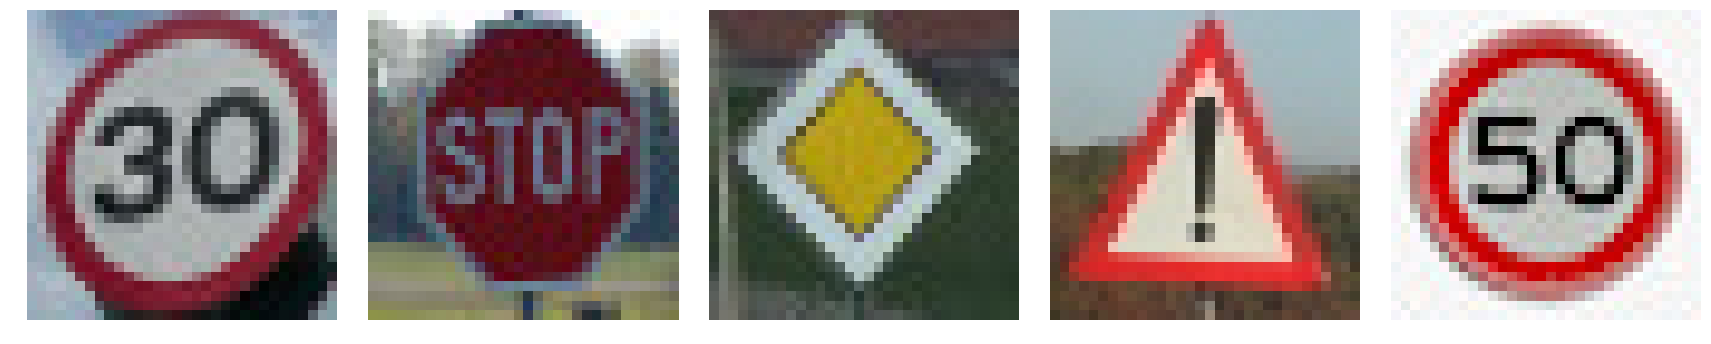

In [29]:
#Loading internet images and displaying.
import os
img = np.zeros((5,32,32,3))
labels = np.zeros((5,))
i=0
for file in os.listdir('./web_images'):
    labels[i] = int(file[0:2])
    img[i] = cv2.imread('./web_images/'+file)
    b,g,r = cv2.split(img[i])      
    img[i] = cv2.merge([r,g,b])
    i=i+1

fig, axs = plt.subplots(1,5, figsize=(30, 24))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
index_subplot=0    

for i in range(5):
    outimg = img[i]
    #print(outimg.shape)
    axs[index_subplot].axis('off')
    axs[index_subplot].imshow(outimg/255)
    index_subplot+=1

### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

Testing on 5 images.....
Accuracy: 1.0


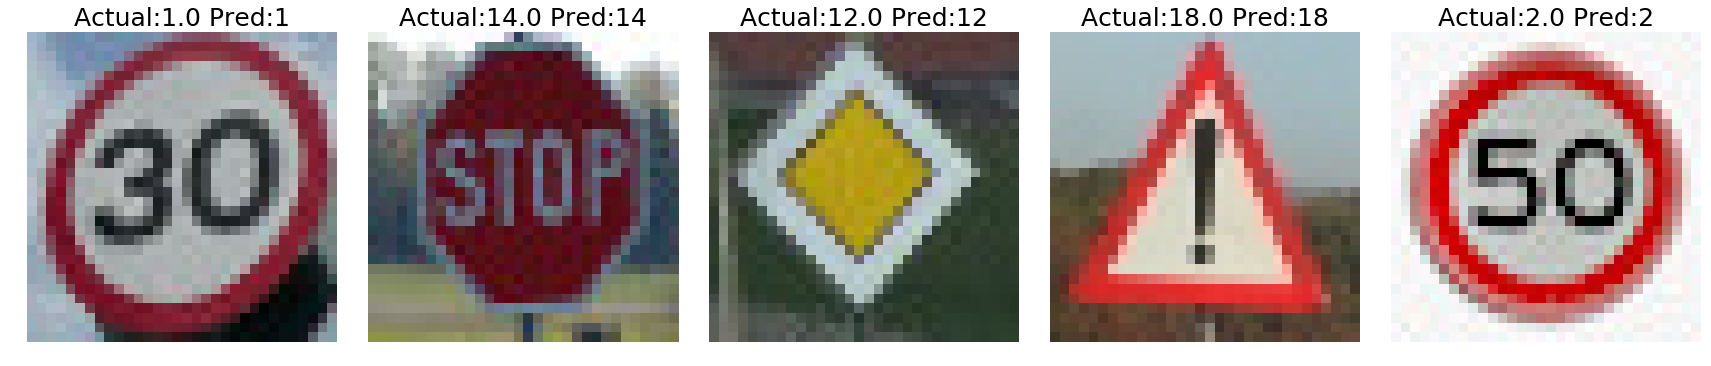

In [34]:
#Running the model on the web images and printing accuracy and prediction
test_image = gray_dataset(img)
accuracy = evaluate(test_image,labels,sess)
softmax_probs = tf.nn.softmax(logits)
answer,soft_probs = sess.run([logits,softmax_probs],feed_dict={x:test_image})
print("Testing on 5 images.....")
print("Accuracy:",accuracy)
fig, axs = plt.subplots(1,5, figsize=(30, 24))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
index_subplot=0
for i in range(5):
    outimg = img[i]
    #print(outimg.shape)
    axs[index_subplot].axis('off')
    axs[index_subplot].imshow(outimg/255)
    stri = "Actual:"+str(labels[i])+" Pred:"+str(np.argmax(answer[i]))
    axs[index_subplot].set_title(stri,fontsize = 25)
    index_subplot+=1

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Top 5 softmax probabilities....


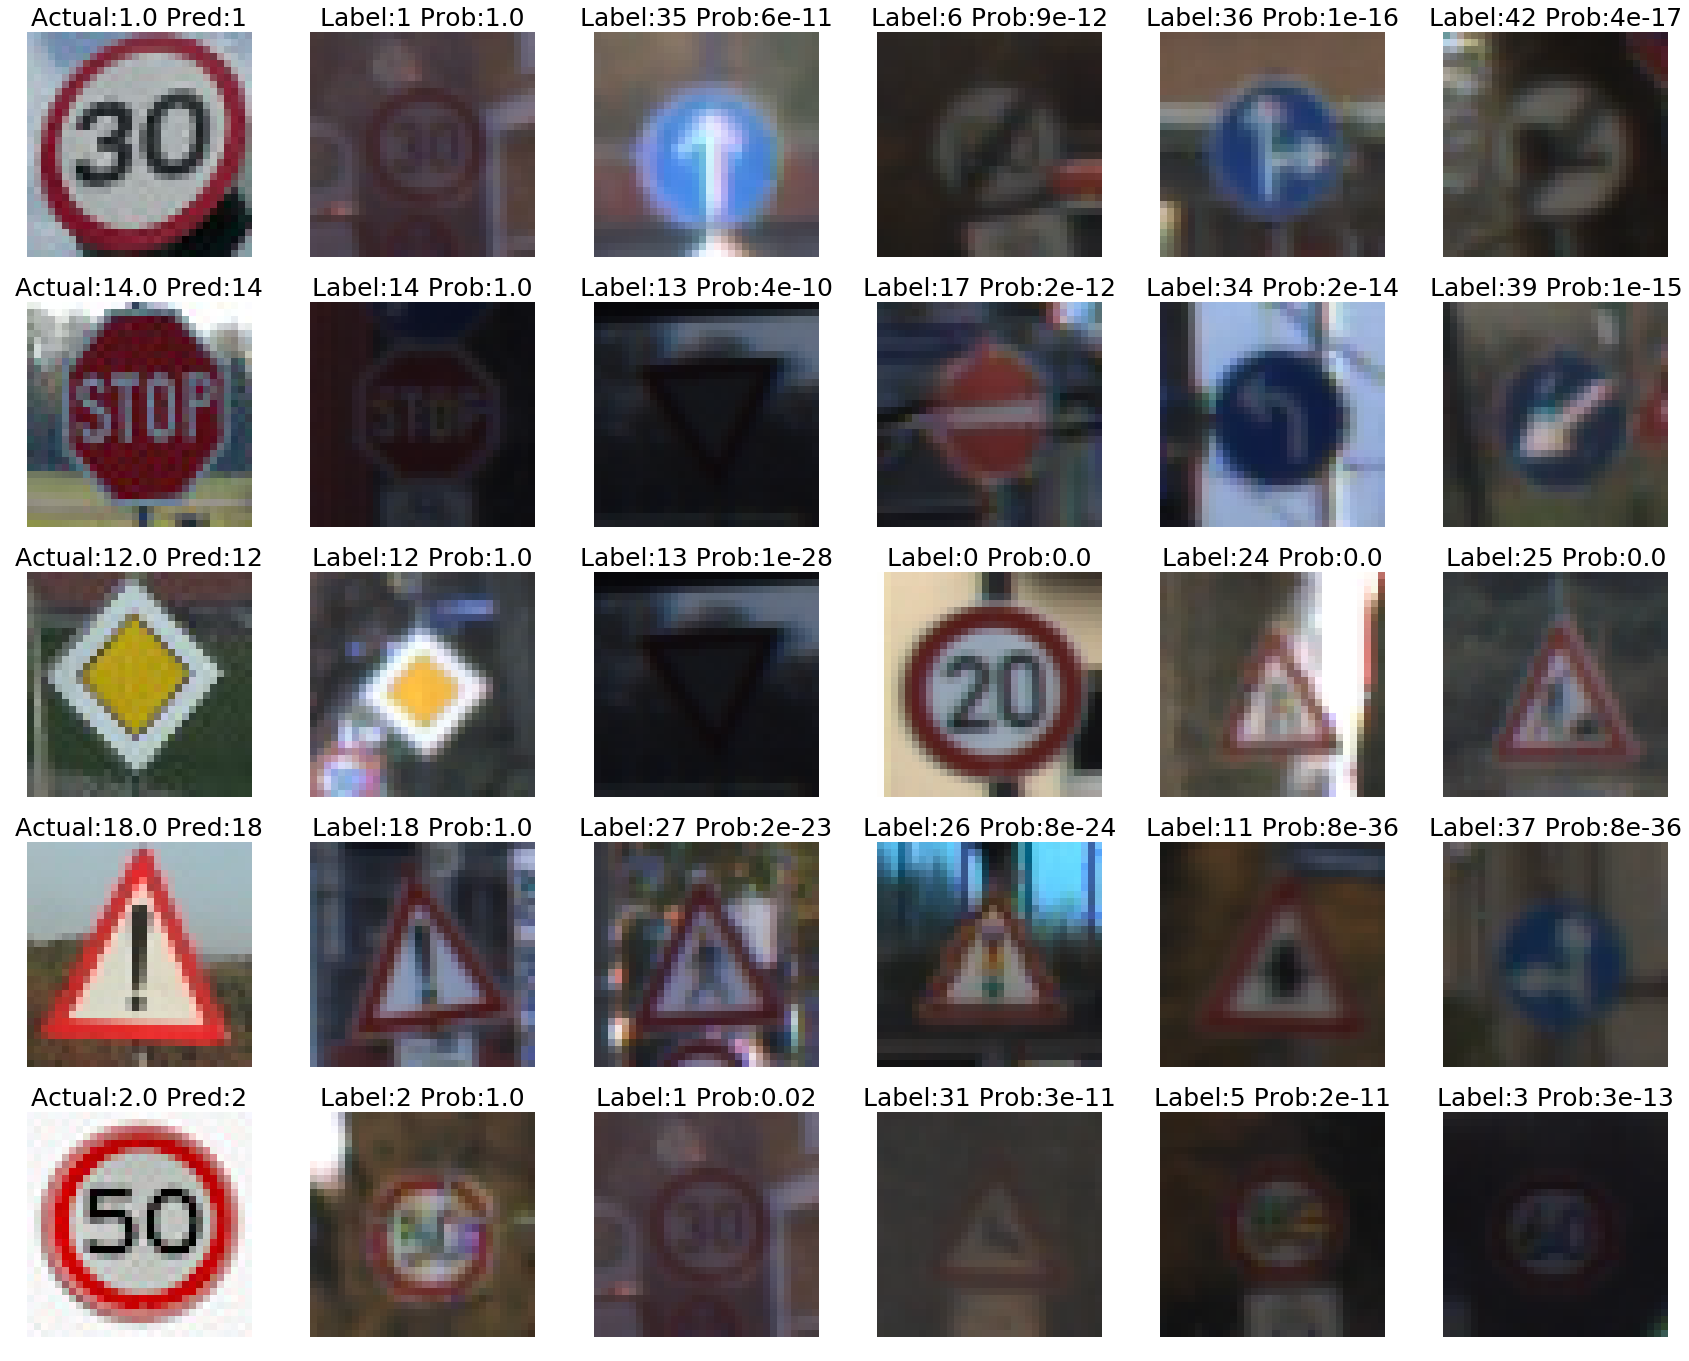

In [38]:
#Finding the top 5 probablities and seeing the closest to the actual image
ind = np.zeros((5,43),dtype=int)

from math import log10, floor

def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

for i in range(5):
    ind[i] = np.argsort(-1*soft_probs[i])

print("Top 5 softmax probabilities....")

fig, axs = plt.subplots(5,6, figsize=(30, 24))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
index_subplot=0

for i in range(5):
    for j in range(6):
        if(j==0):
            outimg = img[i]
            #print(outimg.shape)
            axs[index_subplot].axis('off')
            axs[index_subplot].imshow(outimg/255)
            stri = "Actual:"+str(labels[i])+" Pred:"+str(np.argmax(answer[i]))
            axs[index_subplot].set_title(stri,fontsize = 25)
            index_subplot+=1
            continue
        for k in range(len(y_train_rgb)):
            if ind[i,j-1] == y_train_rgb[k]:
                index = k
                break
        outimg = X_train_rgb[index]
        axs[index_subplot].axis('off')
        axs[index_subplot].imshow(outimg)
        stri = "Label:"+str(ind[i,j-1])+" Prob:"+str(float('%.1g' % soft_probs[i,ind[i,j-1]]))
        axs[index_subplot].set_title(stri,fontsize = 25)
        index_subplot+=1